In [1]:
%matplotlib inline

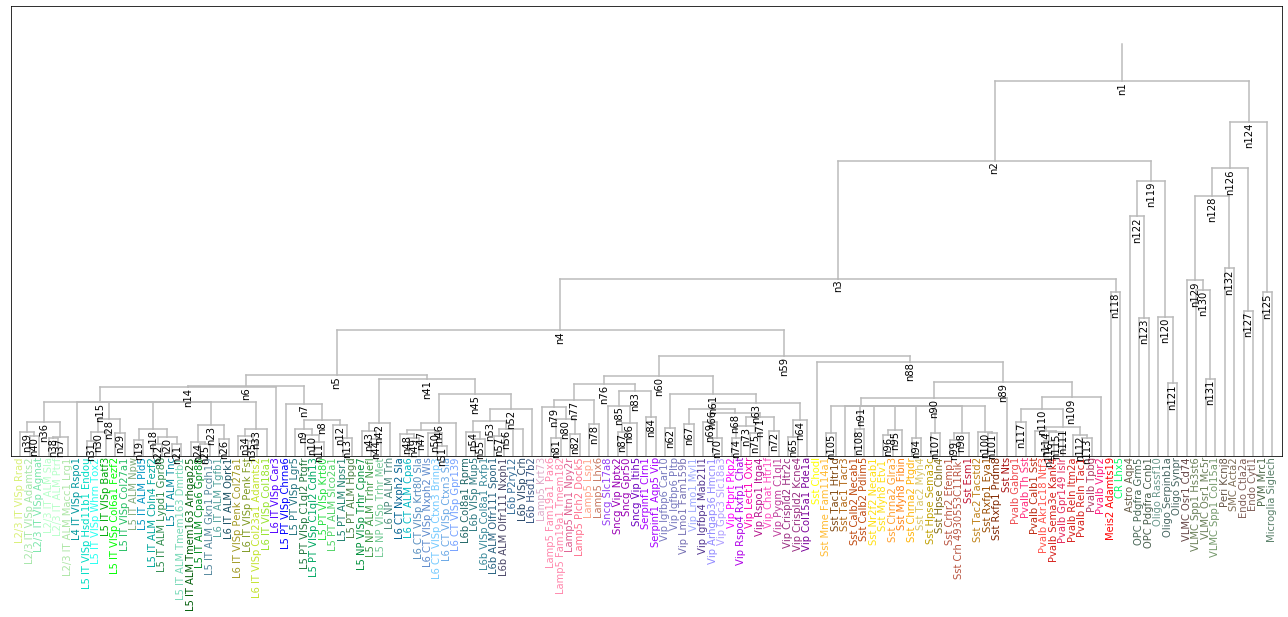

In [2]:
from analysis_tree_helpers import HTree

#Load a tree from the .csv file
htree = HTree(htree_file='./tree_20180520.csv')
htree.plot(figsize=(18,8),fontsize=10)

**Extract subtree for neuronal cells only**

`Meis2 Adamts19` and `CR Lhx5` are outlier types that are ignored by choosing the root node to be `n4`

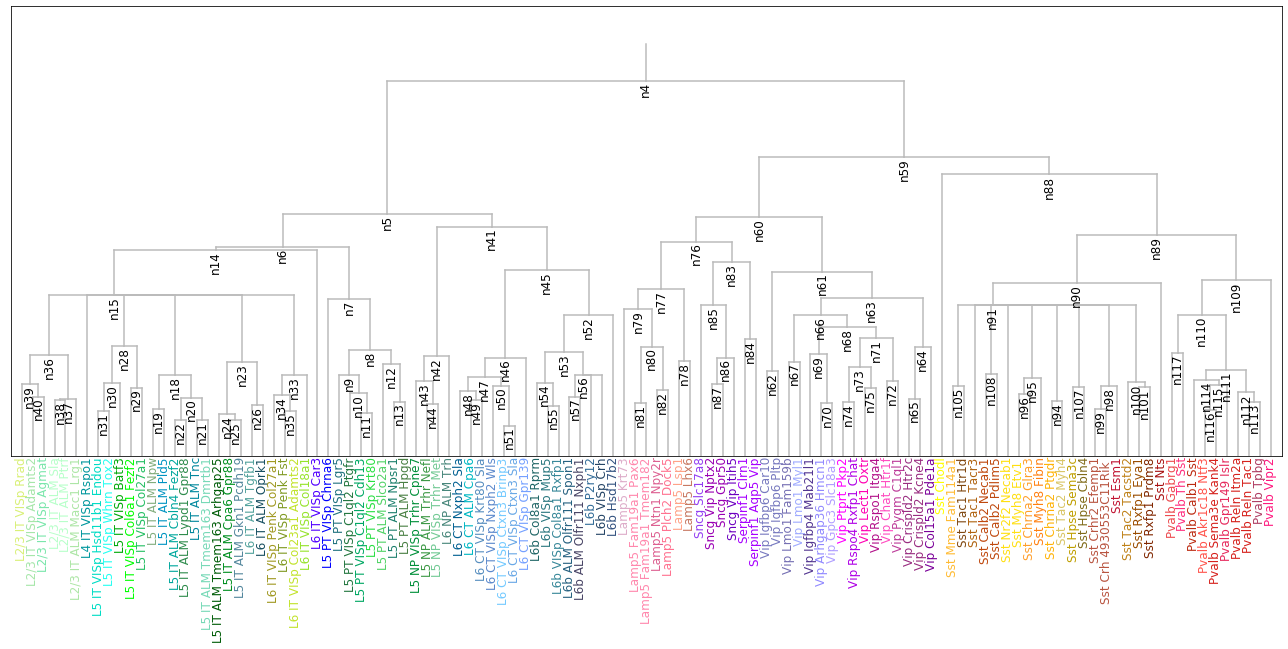

In [3]:
#subtree is a instance of class HTree as well: 
subtree = htree.get_subtree(node='n4')
subtree.plot((18,8),fontsize=12)

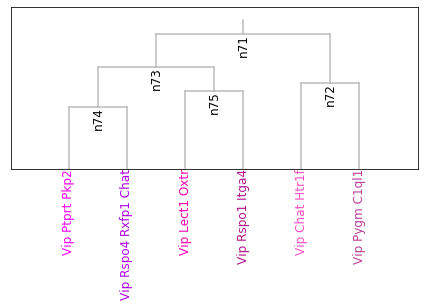

In [4]:
#Let's work with a smaller tree for the examples below:
subtree = htree.get_subtree(node='n71')
subtree.plot((6,3),fontsize=12)

**Reduce resolution of the hierarchical tree**
 - `get_mergeseq` returns list of merges to carry out, sorted by the depth.
 - This is equivalent to starting at the bottom of the tree and making successive horizontal cuts to reduce the number of 'leaf' nodes 

In [5]:
L = subtree.get_mergeseq()

for l in L:
    print(l)

[['Vip Ptprt Pkp2', 'Vip Rspo4 Rxfp1 Chat'], 'n74']
[['Vip Lect1 Oxtr', 'Vip Rspo1 Itga4'], 'n75']
[['Vip Chat Htr1f', 'Vip Pygm C1ql1'], 'n72']
[['n74', 'n75'], 'n73']
[['n72', 'n73'], 'n71']


**Apply changes to the hierarchy to a list of sample labels**

`sample_labels` are a `numpy array` the cells that are assigned some labels from the hierarchy. Consider a dataset with 6 cells, for which the labels are set by hand in the example below:

In [6]:
from analysis_tree_helpers import do_merges
sample_labels = np.array(['Vip Ptprt Pkp2', 
                          'Vip Ptprt Pkp2',
                          'Vip Rspo4 Rxfp1 Chat',
                          'Vip Chat Htr1f', 
                          'Vip Pygm C1ql1',
                          'Vip Pygm C1ql1'])

#Perform a successive merges of the hierarchy:
#Note that the list of labels do not contain the label that is merged in the i-th step, nothing changes. 

for n in range(len(L)):
    print('\n--- n merges = {:d} ---'.format(n))
    merged_sample_labels = do_merges(labels=sample_labels, list_changes=L, n_merges=n, verbose=True)
    
    print('\nUpdated labels::'.format(n))
    for l in merged_sample_labels:
        print(l)


--- n merges = 0 ---

Updated labels::
Vip Ptprt Pkp2
Vip Ptprt Pkp2
Vip Rspo4 Rxfp1 Chat
Vip Chat Htr1f
Vip Pygm C1ql1
Vip Pygm C1ql1

--- n merges = 1 ---
2  in  Vip Ptprt Pkp2  -->  n74
1  in  Vip Rspo4 Rxfp1 Chat  -->  n74

Updated labels::
n74
n74
n74
Vip Chat Htr1f
Vip Pygm C1ql1
Vip Pygm C1ql1

--- n merges = 2 ---
0  in  Vip Ptprt Pkp2  -->  n74
0  in  Vip Rspo4 Rxfp1 Chat  -->  n74
0  in  Vip Lect1 Oxtr  -->  n75
0  in  Vip Rspo1 Itga4  -->  n75

Updated labels::
n74
n74
n74
Vip Chat Htr1f
Vip Pygm C1ql1
Vip Pygm C1ql1

--- n merges = 3 ---
0  in  Vip Ptprt Pkp2  -->  n74
0  in  Vip Rspo4 Rxfp1 Chat  -->  n74
0  in  Vip Lect1 Oxtr  -->  n75
0  in  Vip Rspo1 Itga4  -->  n75
1  in  Vip Chat Htr1f  -->  n72
2  in  Vip Pygm C1ql1  -->  n72

Updated labels::
n74
n74
n74
n72
n72
n72

--- n merges = 4 ---
0  in  Vip Ptprt Pkp2  -->  n74
0  in  Vip Rspo4 Rxfp1 Chat  -->  n74
0  in  Vip Lect1 Oxtr  -->  n75
0  in  Vip Rspo1 Itga4  -->  n75
0  in  Vip Chat Htr1f  -->  n72
0  in  Vip Py

**Examples demonstrating additional functions**

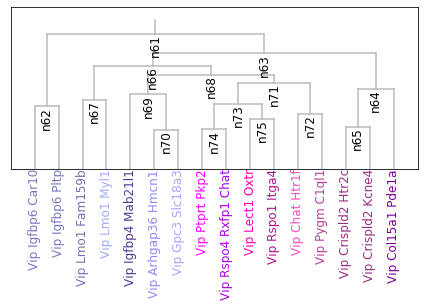

In [7]:
#Extract an inhibitory subtree from this tree. subtree is a instance of class HTree as well:
subtree = htree.get_subtree(node='n61')
subtree.plot((6,3),fontsize=12)

In [8]:
#Get all ancestor nodes as a list
subtree.get_ancestors(node='n72')

['n71', 'n68', 'n66', 'n63', 'n61', 'n60']

In [9]:
#Get all ancestor nodes as a list, upto a specified rootnode
subtree.get_ancestors(node='n72',rootnode='n63')

['n71', 'n68', 'n66', 'n63']

In [10]:
#Get all descendants of a given node
subtree.get_descendants(node='n64')

['Vip Col15a1 Pde1a', 'n65', 'Vip Crispld2 Htr2c', 'Vip Crispld2 Kcne4']

In [11]:
#Get all descendants of a given node, excluding non-leaf nodes
subtree.get_descendants(node='n64',leafonly=True)

['Vip Crispld2 Htr2c', 'Vip Crispld2 Kcne4', 'Vip Col15a1 Pde1a']

In [12]:
#Get sequence of merges that respects the hierarchy:
L = subtree.get_mergeseq()
for l in L:
    print(l)

[['Vip Arhgap36 Hmcn1', 'Vip Gpc3 Slc18a3'], 'n70']
[['Vip Ptprt Pkp2', 'Vip Rspo4 Rxfp1 Chat'], 'n74']
[['Vip Crispld2 Htr2c', 'Vip Crispld2 Kcne4'], 'n65']
[['Vip Lect1 Oxtr', 'Vip Rspo1 Itga4'], 'n75']
[['Vip Chat Htr1f', 'Vip Pygm C1ql1'], 'n72']
[['Vip Igfbp6 Car10', 'Vip Igfbp6 Pltp'], 'n62']
[['n74', 'n75'], 'n73']
[['Vip Lmo1 Fam159b', 'Vip Lmo1 Myl1'], 'n67']
[['Vip Igfbp4 Mab21l1', 'n70'], 'n69']
[['Vip Col15a1 Pde1a', 'n65'], 'n64']
[['n72', 'n73'], 'n71']
[['n69', 'n71'], 'n68']
[['n67', 'n68'], 'n66']
[['n64', 'n66'], 'n63']
[['n62', 'n63'], 'n61']


**Valid partitions**

 - Many different partitions that consistent with the topology but not depths of the nodes in the hierarchical tree. 
 - Below we consider a small hierarchical tree, and list all such partitions.

      x         y  isleaf                 child parent      col
0  76.0  0.000000    True        Vip Ptprt Pkp2    n74  #FF00FF
1  77.0  0.000000    True  Vip Rspo4 Rxfp1 Chat    n74  #AF00E6
2  78.0  0.000000    True        Vip Lect1 Oxtr    n75  #FF00B3
3  79.0  0.000000    True       Vip Rspo1 Itga4    n75  #B3128A
4  76.5  0.046457   False                   n74    n73  #000000
5  78.5  0.058979   False                   n75    n73  #000000
6  77.5  0.076612   False                   n73    n71  #000000


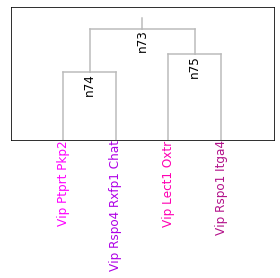

In [13]:
from analysis_tree_helpers import Node, get_valid_classifications

#Define a subtree:
subtree = htree.get_subtree(node='n73')
subtree.plot(figsize=(4,2.5),fontsize=12)

#Get a pandas dataframe for this tree:
subtree_df=subtree.obj2df()
print(subtree_df)

In [14]:
#Define the root node to calculate the different classifications:
start_node = Node(name='n73',
                  C_list=subtree_df['child'].values,
                  P_list=subtree_df['parent'].values)

#Get all possible classifications consistent with the tree defined by subtree_df
valid_classifications = []
valid_classifications = get_valid_classifications([start_node],
                                                  C_list=subtree_df['child'].values,
                                                  P_list=subtree_df['parent'].values,
                                                  valid_classes=valid_classifications)

#List all the classifications, sorted by the number of classes that remain
valid_classifications.sort(key=len)
for v in valid_classifications:
    print(v)

['n73']
['n74', 'n75']
['Vip Ptprt Pkp2', 'Vip Rspo4 Rxfp1 Chat', 'n75']
['Vip Lect1 Oxtr', 'Vip Rspo1 Itga4', 'n74']
['Vip Lect1 Oxtr', 'Vip Ptprt Pkp2', 'Vip Rspo1 Itga4', 'Vip Rspo4 Rxfp1 Chat']


**Calculating number of partitions for the major inhibitory cell classes**

In [15]:
#Load a tree from the .csv file
htree = HTree(htree_file='./tree_20180520.csv')
subtree = htree.get_subtree(node='n59')

subclass_names = ['Lamp+Sncg','Vip','Sst','Pvalb']
for k,n in enumerate(['n76','n61','n90','n109']):
    subtree = htree.get_subtree(node=n)
    subtree_df=subtree.obj2df()
    start_node = Node(name=n,C_list=subtree_df['child'].values,P_list=subtree_df['parent'].values)
    valid_classifications = []
    valid_classifications = get_valid_classifications([start_node],
                                                      C_list=subtree_df['child'].values,
                                                      P_list=subtree_df['parent'].values,
                                                      valid_classes=valid_classifications)
    print('{} can be partitioned in {} ways'.format(subclass_names[k],len(valid_classifications)))

Lamp+Sncg can be partitioned in 118 ways
Vip can be partitioned in 417 ways
Sst can be partitioned in 434 ways
Pvalb can be partitioned in 28 ways
